In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
features = pd.read_excel('features_1.xlsx')
features = features.drop(columns=['Unnamed: 0'])
conditions = [
    (features['Label'] == 0),
    (features['Label'] == 1),
    (features['Label'] == 2),
    (features['Label'] == 3),
    (features['Label'] == 4),
    (features['Label'] == 5)]
choices = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais']
features['defeitos'] = np.select(conditions, choices)

In [ ]:
X = features.iloc[:,0:5]

#X = X.T
#X = preprocessing.scale(X)
#X = X.T
Y = features.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 41)

#X_padrao = StandardScaler().fit(X_treino)
#X_treino = X_padrao.transform(X_treino)
#X_teste = X_padrao.transform(X_teste)

GBC = GradientBoostingClassifier(n_estimators = 100, max_depth=10, min_samples_leaf = 7, min_samples_split = 7, learning_rate=0.01, random_state = 13)
GBC.fit(X_treino, Y_treino)
testt = GBC.predict(X_teste)
scoree = accuracy_score(Y_teste, testt)
print("Gradient Boosting testing accuracy=",scoree*100)

Gradient Boosting testing accuracy= 90.83333333333333


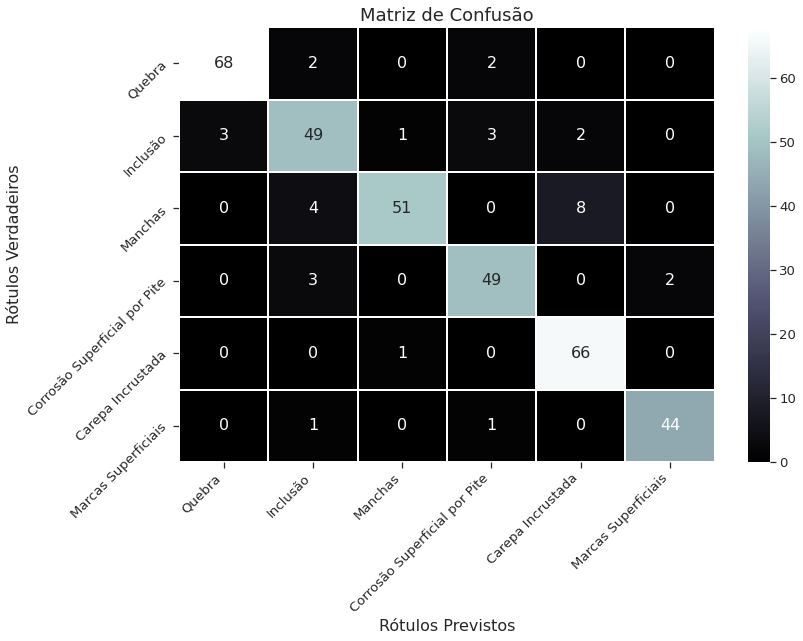

In [ ]:
import matplotlib.pyplot as plt

pred = GBC.predict(X_teste)

c_matrix = confusion_matrix(pred, Y_teste)

ax = plt.subplot()
sns.set(style="ticks", color_codes=True, rc={"figure.figsize": (12, 8)}, font_scale=1.2)
sns.heatmap(c_matrix, annot=True, ax = ax, annot_kws={"size": 16}, linewidths=1, cmap = "bone");
ax.set_xlabel('Rótulos Previstos', size = '16'); ax.set_ylabel('Rótulos Verdadeiros', size = '16');
ax.set_title('Matriz de Confusão', size = '18')
ax.xaxis.set_ticklabels(choices, rotation = 45, ha = 'right'); ax.yaxis.set_ticklabels(choices, rotation = 45);

findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Segoe UI'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


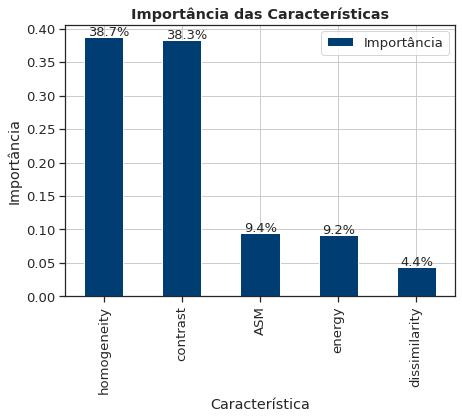

In [ ]:
importances = pd.DataFrame({'Característica':X_treino.columns, 'Importância': np.round(GBC.feature_importances_, 3)})
x = np.linspace(0, 12, 5, endpoint=True)
importances2= importances.sort_values('Importância', ascending = False)
ax = importances2.plot(kind='bar', grid=True, figsize=(7,5), color = '#003d72')
ax.set_axisbelow(True)
plt.title("Importância das Características", fontweight='bold', fontname ='Segoe UI')

# plt.rc('font', size=20)                # controls default text sizes
plt.rc('axes', titlesize=16)             # fontsize of the axes title
plt.rc('axes', labelsize=14)             # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)            # fontsize of the tick (eixo) labels
plt.rc('ytick', labelsize=12)            # fontsize of the tick (eixo) labels
plt.rc('legend', fontsize=12)            # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#rot_y=[]
x = np.linspace(-0.2, 3.8, 5, endpoint=True)
for i in range(len(importances2)):
    rot = round(np.array(importances2)[i,1]*100 ,2)
    plt.text(x[i],np.array(importances2)[i,1]+0.002,str(rot)+"%", size = 13, fontname ='Arial')
    #rot_y.append(rot2)
    #print(rot_y)
    
#ax.set_yticklabels(str(rot2))
ax.set_xlabel('Característica', fontname ='Segoe UI')
ax.set_ylabel('Importância', fontname ='Segoe UI')
#ax.set_xticks(positions)

#ax.set_xticks(rot)
ax.set_xticklabels(importances2['Característica'], fontname ='Segoe UI')
#ax.set_yticklabels = (rot_y)
#print (ax.set_xticklabels)

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 300, 450, 850, 1000],
    'learning_rate' : [0.001, 0.01, 0.5],
    'max_depth' : [10, 30, 50, 70],
    'min_samples_leaf' : [1, 3, 5, 6, 7],
    'min_samples_split': [1, 5, 9, 13, 15],
}
grid_GB = GridSearchCV(estimator = GradientBoostingClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_GB.fit(X_treino, Y_treino)
grid_GB.best_estimator_
testt2=grid_GB.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("Gradient Boosting testing accuracy=",scoree2*100)